<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico Nº0
#### Nombre y Apellido


# Por que imagenes cuadradas?
Jupyter Notebook es una herramienta para la confección de reportes técnicos, dado que permite la interacción en el mismo ambiente de: 
1. un procesador de texto elemental (formato Markdown) que permite resaltar texto, en forma de *itálica* o **negrita** de manera muy legible (haciendo doble click en este texto podrás ver el código fuente estilo Markdown). Cuenta con estilos predefinidos:

# Título 1
## Título 2
### Título 3

y también la capacidad de incluir enlaces a otras páginas, como por ejemplo [esta página](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) donde encontrarás más funcionalidades del lenguaje **Markdown**

2. capacidad para incluir lenguaje matemático estilo LaTex, tanto de forma presentada

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \frac{ b_2 \, z^{-2} + b_1 \,  z^{-1} + b_0 }
{a_2 \, z^{-2} + a_1 \,  z^{-1} + a_0}
\end{equation}

como *inline* en el propio párrafo $y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $

3. La posibilidad de incluir scripts en Python, como los que usaremos para las simulaciones en los TPs de la materia. En este caso usaremos el *testbench0.py* como ejemplo. Una vez que lo probamos y estamos seguros que funciona de forma esperada en *Spyder*, podemos incluir los resultados de la simulación de manera casi transparente. Solo tenemos que agregar una celda de código donde incluimos el código, y los resultados directamente quedan incluidos en este documento.

In [7]:
"""
Created on Wed Jun 12 15:02:12 2019

@author: lucas
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt


def optimal_resize_square_images(im,output_size):
    (h,w) = im.shape[0:2]
    if(output_size==h or output_size==w):
        return im
    #evaluo si la imagen cuadrada es mas grange o mas chica que la original
    if(h>output_size or w>output_size):
        return cv2.resize(im,(output_size,output_size),interpolation = cv2.INTER_AREA)
    else:
        return cv2.resize(im,(output_size,output_size),interpolation = cv2.INTER_CUBIC)

def optimal_resize_image_tensor(tensor,output_size):
    return np.stack([optimal_resize_square_images(tensor[i],output_size=output_size) 
                        for i in range(0,tensor.shape[0])])

In [8]:
def square_images(im,output_size):
    """
    Recibe una imagen en chl y devuelve un tensor de imagenes de NXN donde N es la menor dimension de la imagen
    e.g si se recibe una imagen de 540*1240 el resultado seran varias imagenes de 540*540, las cuales cubren
    todas las zonas de interes de la original.
    
    si la imagen es cuadrada se devuelve un tensor con la imagen original y una imagen en negro a su vez un indicador de que
    la imagen es cuadrada
    """
    imgheight=im.shape[0]
    imgwidth=im.shape[1]
    #busco si la imagen es ancha larga o cuadrada para saber en que direccion cortar
    if imgheight==imgwidth:
        tr = np.ones((1,im.shape[0],im.shape[1],im.shape[2]))*0
        tr[0] = im        
        return optimal_resize_image_tensor(tr,output_size=output_size)
    elif(imgheight<imgwidth):
        out_size = imgheight
    else:
        out_size = imgwidth
    
    tiles = []
    for y in range(0,imgheight,out_size):
        for x in range(0, imgwidth, out_size):
            y1 = y + out_size
            x1 = x + out_size
            n_img = im[y:y1,x:x1]
            if n_img.shape[:2] == (out_size,out_size):
                tiles.append(n_img)

    if(imgheight<imgwidth):
        for y in range(0,imgheight,out_size):
            for x in range(imgwidth, 0, -out_size):
                y1 = y + out_size
                x1 = x - out_size
                n_img = im[y:y1,x1:x]
                if n_img.shape[:2] == (out_size,out_size):
                    tiles.append(n_img)
    else:
        for y in range(imgheight,0,-out_size):
            for x in range(0, imgwidth, out_size):
                y1 = y - out_size
                x1 = x + out_size
                n_img = im[y1:y,x:x1]
                if n_img.shape[:2] == (out_size,out_size):
                    tiles.append(n_img)

    return optimal_resize_image_tensor(np.stack(tiles),output_size=output_size)


Dado que nuestro *testbench* ha sido desarrollado de manera funcional, llamando a la función *my_testbench()* con diferentes parámetros, podemos lograr funcionalidades diferentes, como mostramos a continuación primero con una senoidal:

(<matplotlib.image.AxesImage at 0x7fbcc4e44080>,
 Text(0.5, 1.0, 'Patron Rotacion Original 2400X2400'))

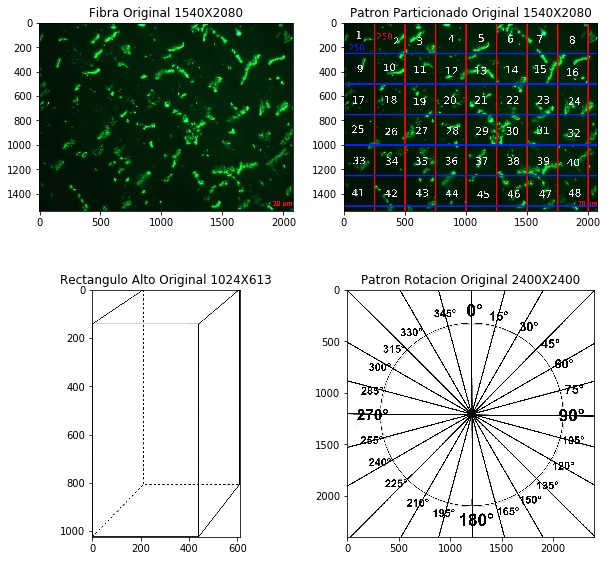

In [14]:
im1 = cv2.imread("i2.tif")
im2 = cv2.imread("patron_desp.png")
im3 = cv2.imread("hrect.jpg")
im4 = cv2.imread("compass_15.png")
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(im1[:,:,::-1]),plt.title("Fibra Original %sX%s"%(im1.shape[0:2]))
plt.subplot(2,2,2)
plt.imshow(im2[:,:,::-1]),plt.title("Patron Particionado Original %sX%s"%(im2.shape[0:2]))
plt.subplot(2,2,3)
plt.imshow(im3[:,:,::-1]),plt.title("Rectangulo Alto Original %sX%s"%(im3.shape[0:2]))
plt.subplot(2,2,4)
plt.imshow(im4[:,:,::-1]),plt.title("Patron Rotacion Original %sX%s"%(im4.shape[0:2]))

(<matplotlib.image.AxesImage at 0x7fbcc4d11128>,
 Text(0.5, 1.0, 'Patron Rotacion 250X250'))

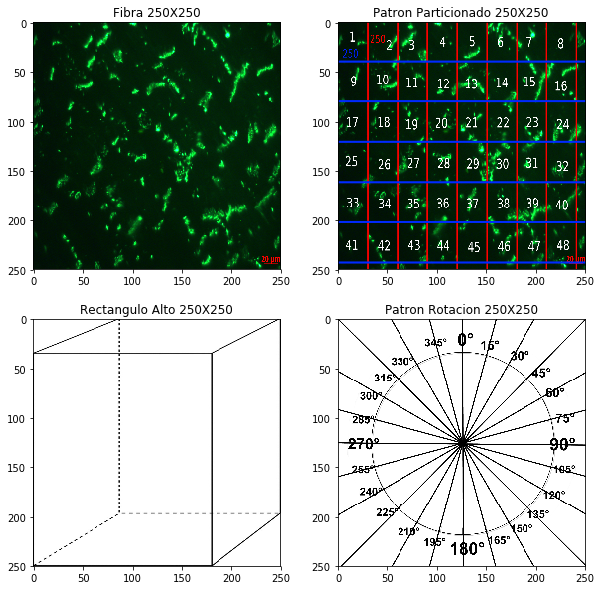

In [15]:
alto = 250
largo = 250

output_shape = (alto,largo)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(cv2.resize(im1[:,:,::-1],output_shape)),plt.title("Fibra %sX%s"%output_shape)
plt.subplot(2,2,2)
plt.imshow(cv2.resize(im2[:,:,::-1],output_shape)),plt.title("Patron Particionado %sX%s"%output_shape)
plt.subplot(2,2,3)
plt.imshow(cv2.resize(im3[:,:,::-1],output_shape)),plt.title("Rectangulo Alto %sX%s"%output_shape)
plt.subplot(2,2,4)
plt.imshow(cv2.resize(im4[:,:,::-1],output_shape)),plt.title("Patron Rotacion %sX%s"%output_shape)

(<matplotlib.image.AxesImage at 0x7fbcc4b3dbe0>,
 Text(0.5, 1.0, 'Patron Rotacion 250X250'))

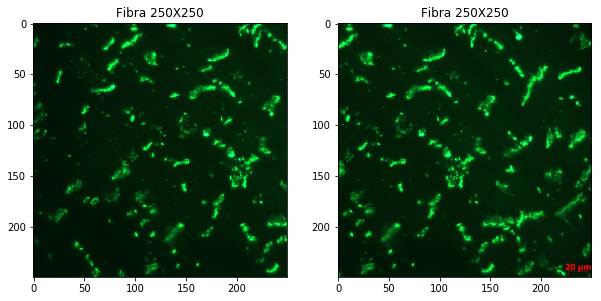

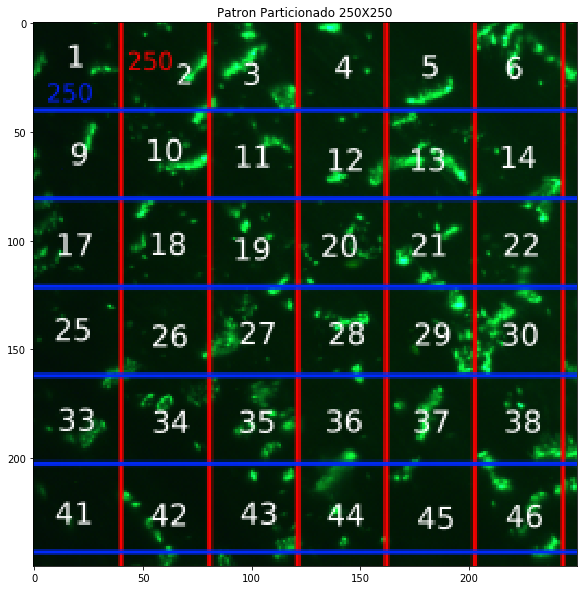

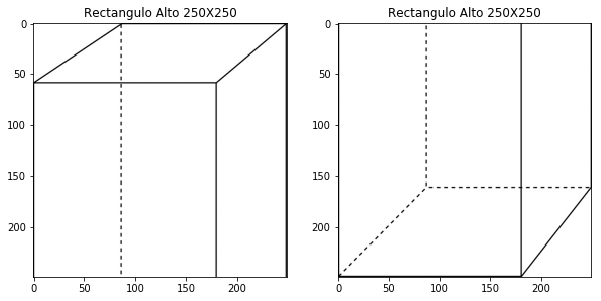

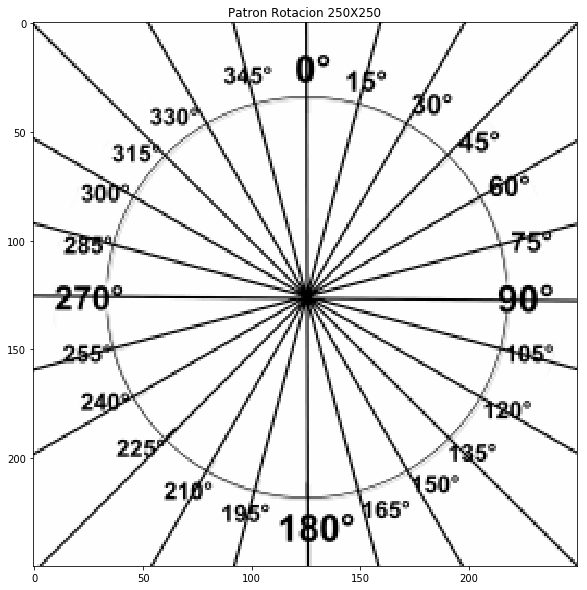

In [16]:
dimension_salida = 250 #significa que las imagenes seran de 500X500
im1_sq = square_images(im1,output_size=dimension_salida)
im2_sq = square_images(im2,output_size=dimension_salida)
im3_sq = square_images(im3,output_size=dimension_salida)
im4_sq = square_images(im4,output_size=dimension_salida)
#matnego el formato con el que vengo trabajando, tensores en uint8_t
im1_sq = np.array(im1_sq).astype(np.uint8)
im2_sq = np.array(im2_sq).astype(np.uint8)
im3_sq = np.array(im3_sq).astype(np.uint8)
im4_sq = np.array(im4_sq).astype(np.uint8)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(im1_sq[0][:,:,::-1]),plt.title("Fibra %sX%s"%(dimension_salida,dimension_salida))
plt.subplot(1,2,2),plt.imshow(im1_sq[1][:,:,::-1]),plt.title("Fibra %sX%s"%(dimension_salida,dimension_salida))

plt.figure(figsize=(10,10))
plt.imshow(im2_sq[0][:,:,::-1]),plt.title("Patron Particionado %sX%s"%(dimension_salida,dimension_salida))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(im3_sq[0][:,:,::-1]),plt.title("Rectangulo Alto %sX%s"%(dimension_salida,dimension_salida))
plt.subplot(1,2,2),plt.imshow(im3_sq[1][:,:,::-1]),plt.title("Rectangulo Alto %sX%s"%(dimension_salida,dimension_salida))

plt.figure(figsize=(10,10))
plt.imshow(im4_sq[0][:,:,::-1]),plt.title("Patron Rotacion %sX%s"%(dimension_salida,dimension_salida))

Y ahora con una señal aleatoria, en este caso ruido blanco Gaussiano incorrelado de varianza $\sigma^2$:

In [17]:
# Usar CTRL+1 para comentar o descomentar el bloque de abajo.
sig_props = { 'tipo': 'ruido', 
              'varianza': (1, 1, 1) # Uso de tuplas para las frecuencias 
             } 
sig_props['descripcion'] = [ '$\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]
    
# Invocamos a nuestro testbench exclusivamente: 
my_testbench( sig_props )


NameError: name 'my_testbench' is not defined

Como puede verse en la figura anterior, al samplear una distribución estadística de media nula y varianza $\sigma^2=1$, obtenemos realizaciones cuyo parámetro $\sigma^2$ estimado, es decir $\hat\sigma^2$, tienen una desviación respecto al verdadero valor (sesgo). Nos ocuparemos de estudiar el sesgo y la varianza de algunos estimadores cuando veamos **Estimación Espectral**.

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online](http://nbviewer.jupyter.org/github/marianux/pdstestbench/blob/master/notebook0.ipynb).